In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")
df

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...,...
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


In [3]:
df.shape

(524164, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [5]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [6]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [7]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [8]:
if "id" in df.columns:
    df = df.drop(columns=["id"])
df

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


In [9]:
df = df.fillna(df.mean())
df

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


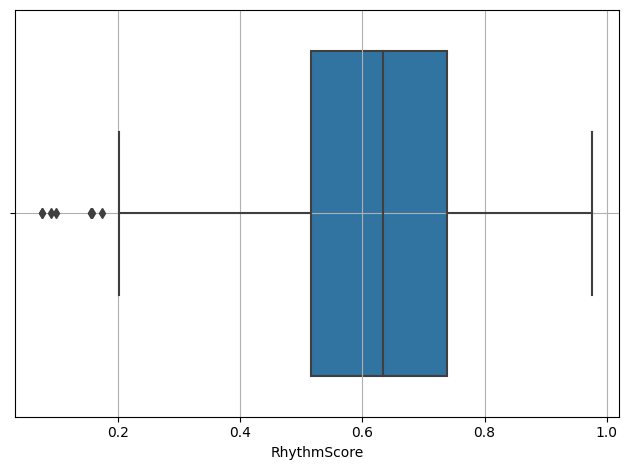

In [10]:
sns.boxplot(x = df.RhythmScore)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# sns.boxplot(x = df.VocalContent)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

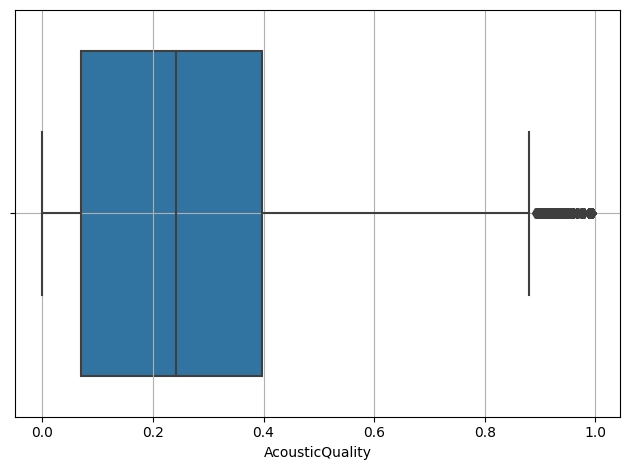

In [12]:
sns.boxplot(x = df.AcousticQuality)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/802034281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.AudioLoudness, kde=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

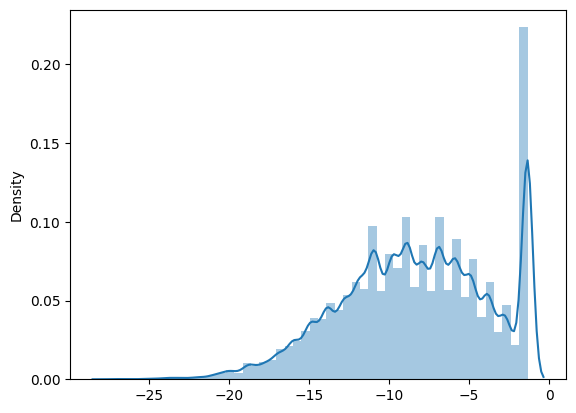

In [13]:
sns.distplot(x = df.AudioLoudness, kde=True)

/tmp/ipykernel_13/700038986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.AcousticQuality, kde=True, color='lightgreen')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

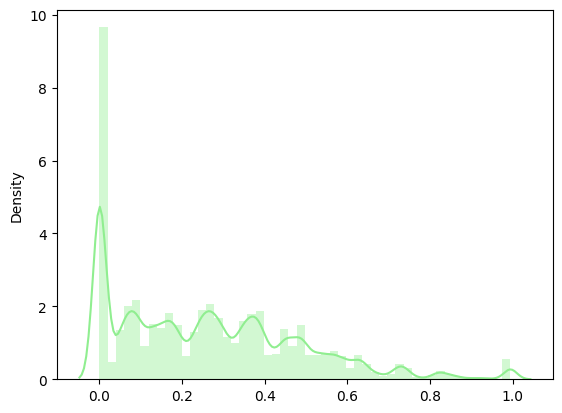

In [14]:
sns.distplot(x = df.AcousticQuality, kde=True, color='lightgreen')

<Axes: xlabel='InstrumentalScore'>

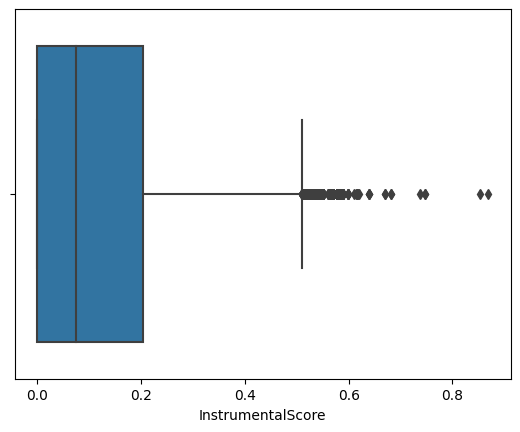

In [15]:
sns.boxplot(x = df.InstrumentalScore)

<Axes: xlabel='MoodScore'>

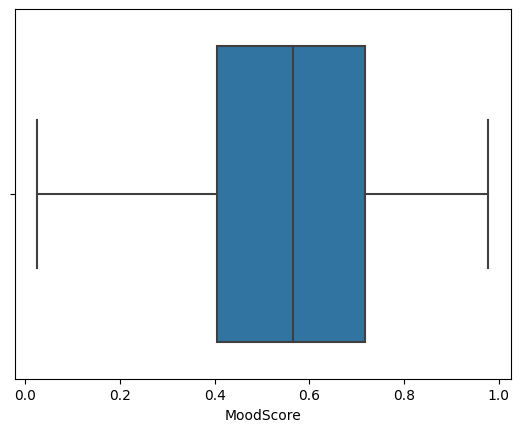

In [16]:
sns.boxplot(x = df.MoodScore)

In [17]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

RhythmScore: 8 outliers
AudioLoudness: 1770 outliers
VocalContent: 1245 outliers
AcousticQuality: 6746 outliers
InstrumentalScore: 2845 outliers
LivePerformanceLikelihood: 129 outliers
MoodScore: 0 outliers
TrackDurationMs: 4267 outliers
Energy: 0 outliers
BeatsPerMinute: 2141 outliers


In [18]:
# Q1 = df['AcousticQuality'].quantile(0.25)
# Q3 = df['AcousticQuality'].quantile(0.75)
# IQR = Q3 - Q1
# IQR
# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# print('Lower Limit : ',lower_limit)
# print('Upper Limit : ',upper_limit)
# df.loc[df['AcousticQuality'] > upper_limit]
# df.loc[df['AcousticQuality'] < lower_limit]
# df.loc[df['AcousticQuality'] > upper_limit, 'AcousticQuality'] = df['AcousticQuality'].median()

In [19]:
cols=df.columns
for column in cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  #Bounds:
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  # outliers = df[(df[column]>upper) | (df[column]<lower)]
  # #print(f"Total outliers w.r.t {column} = {outliers.sum}")
  df = df[(df[column]<upper) & (df[column]>lower)]

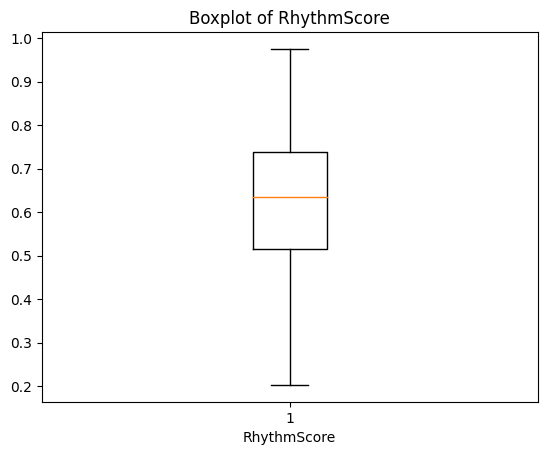

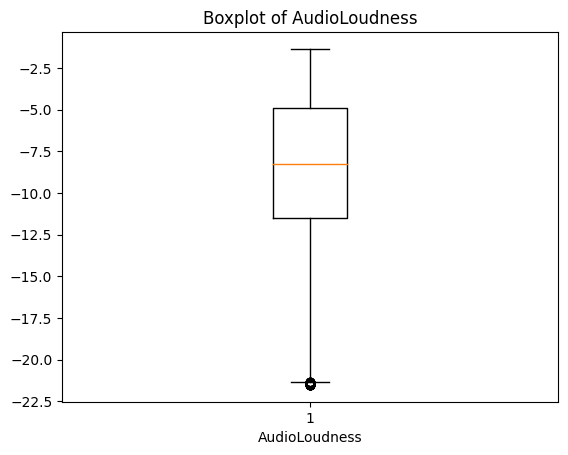

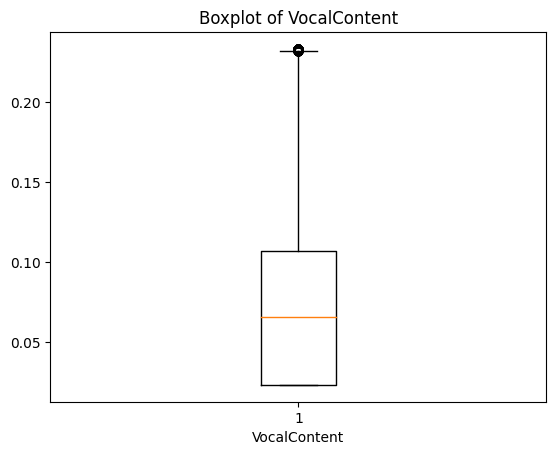

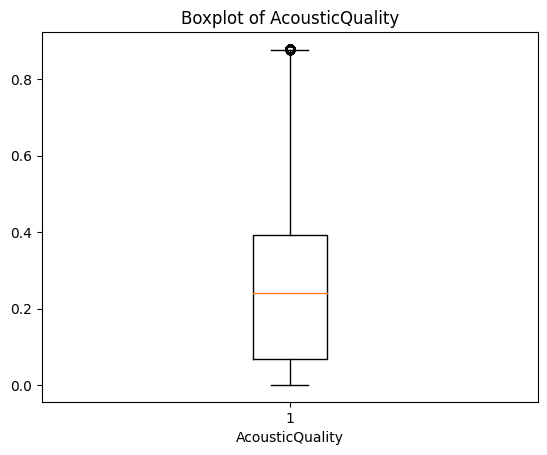

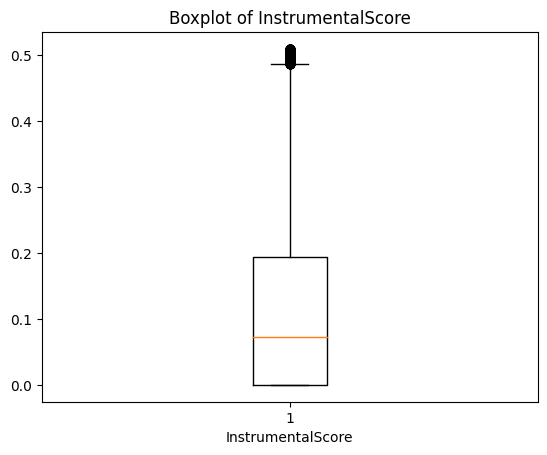

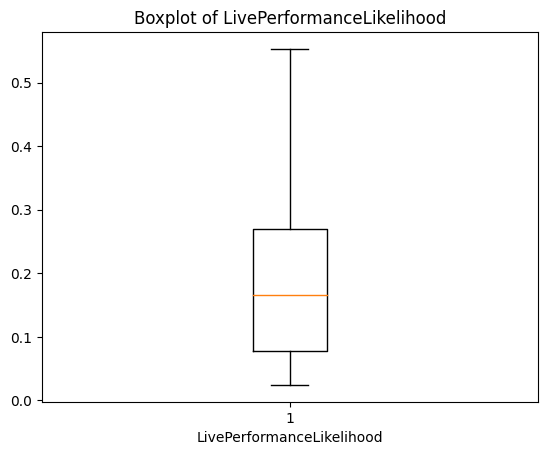

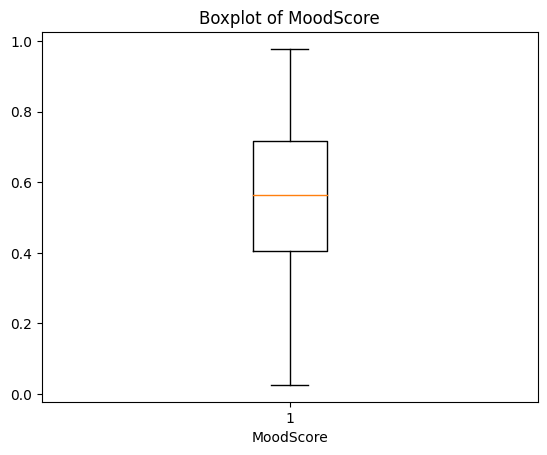

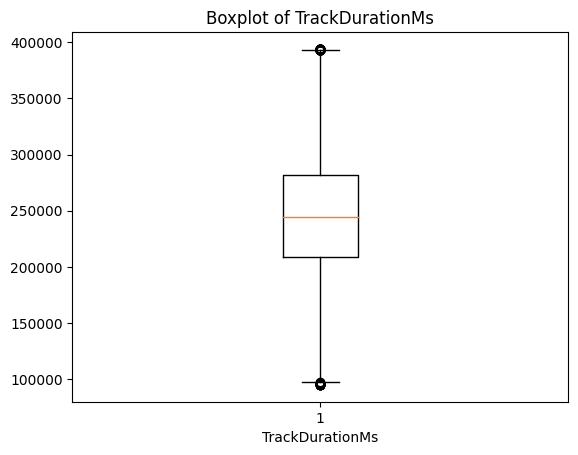

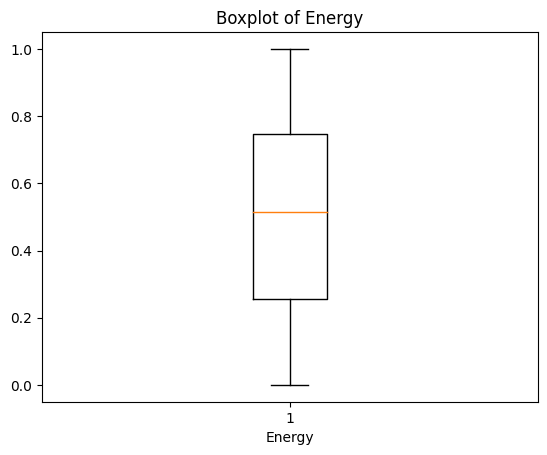

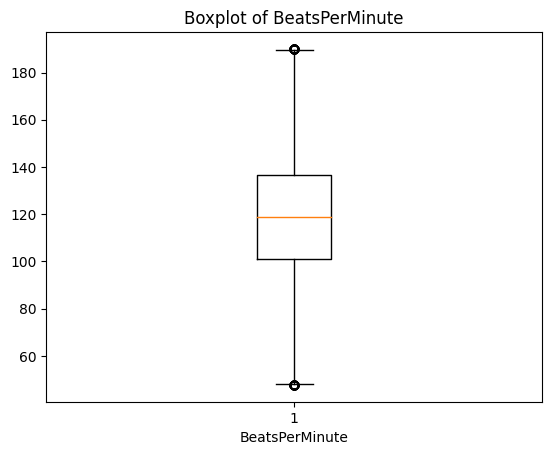

In [20]:
for col in df.columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

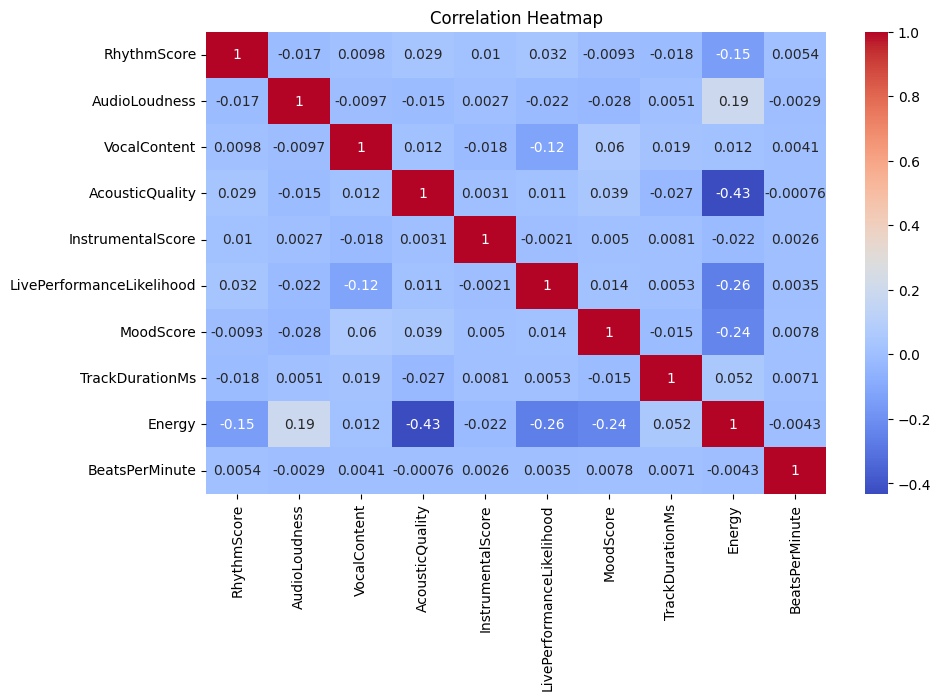

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

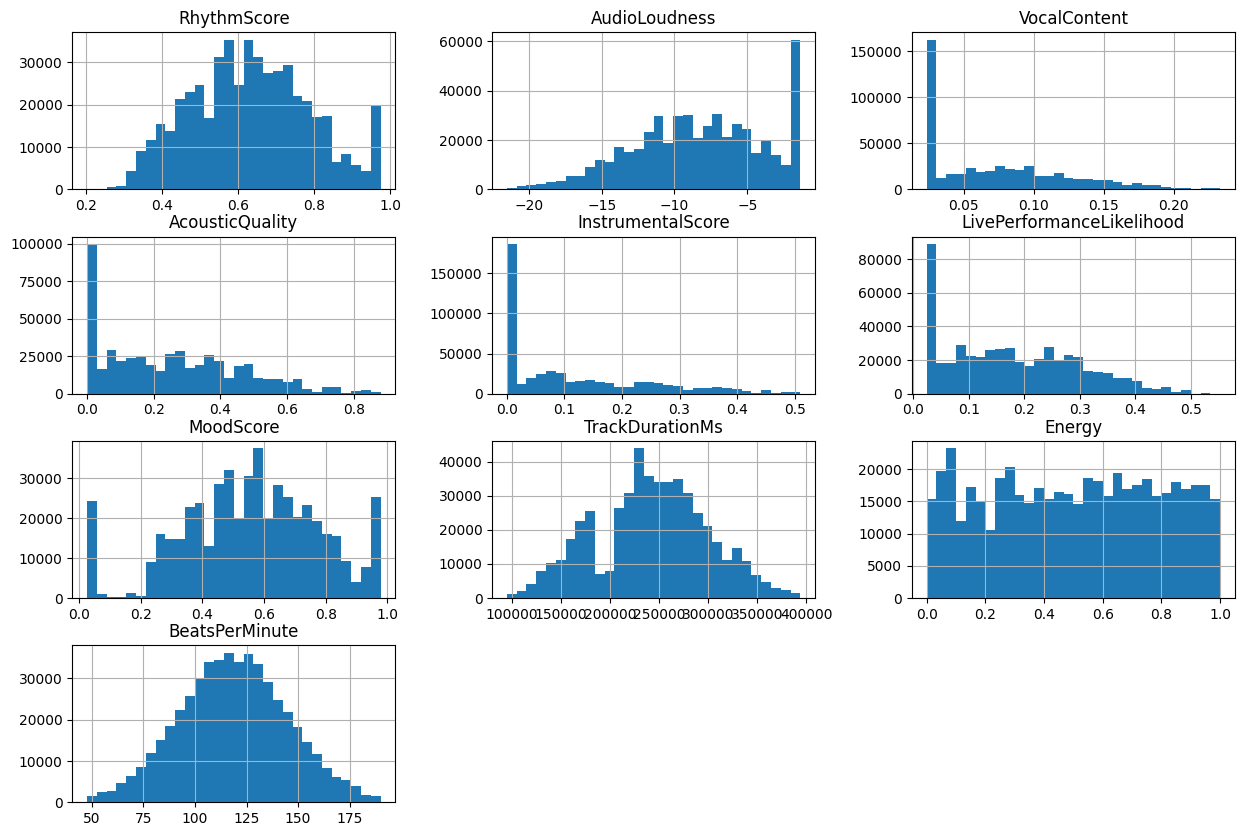

In [22]:
df.hist(figsize=(15,10), bins=30)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


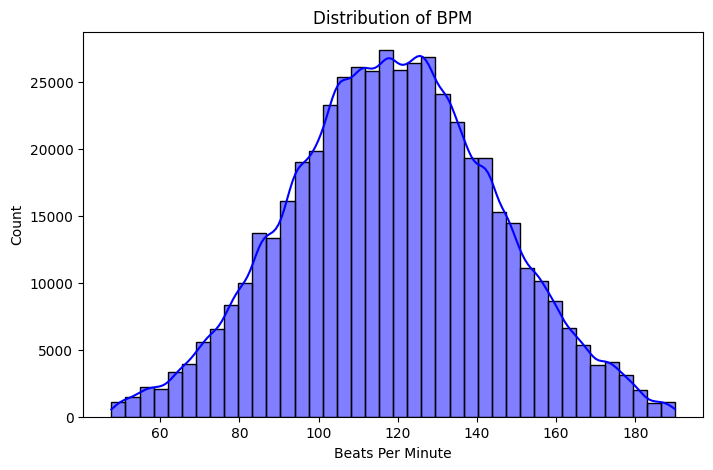

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df["BeatsPerMinute"], bins=40, kde=True, color="blue")
plt.title("Distribution of BPM")
plt.xlabel("Beats Per Minute")
plt.show()


In [24]:
# plt.figure(figsize=(8,5))
# sns.scatterplot(x=df["Energy"], y=df["BeatsPerMinute"], alpha=0.3)
# plt.title("Energy vs BPM")
# plt.xlabel("Energy")
# plt.ylabel("BPM")
# plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

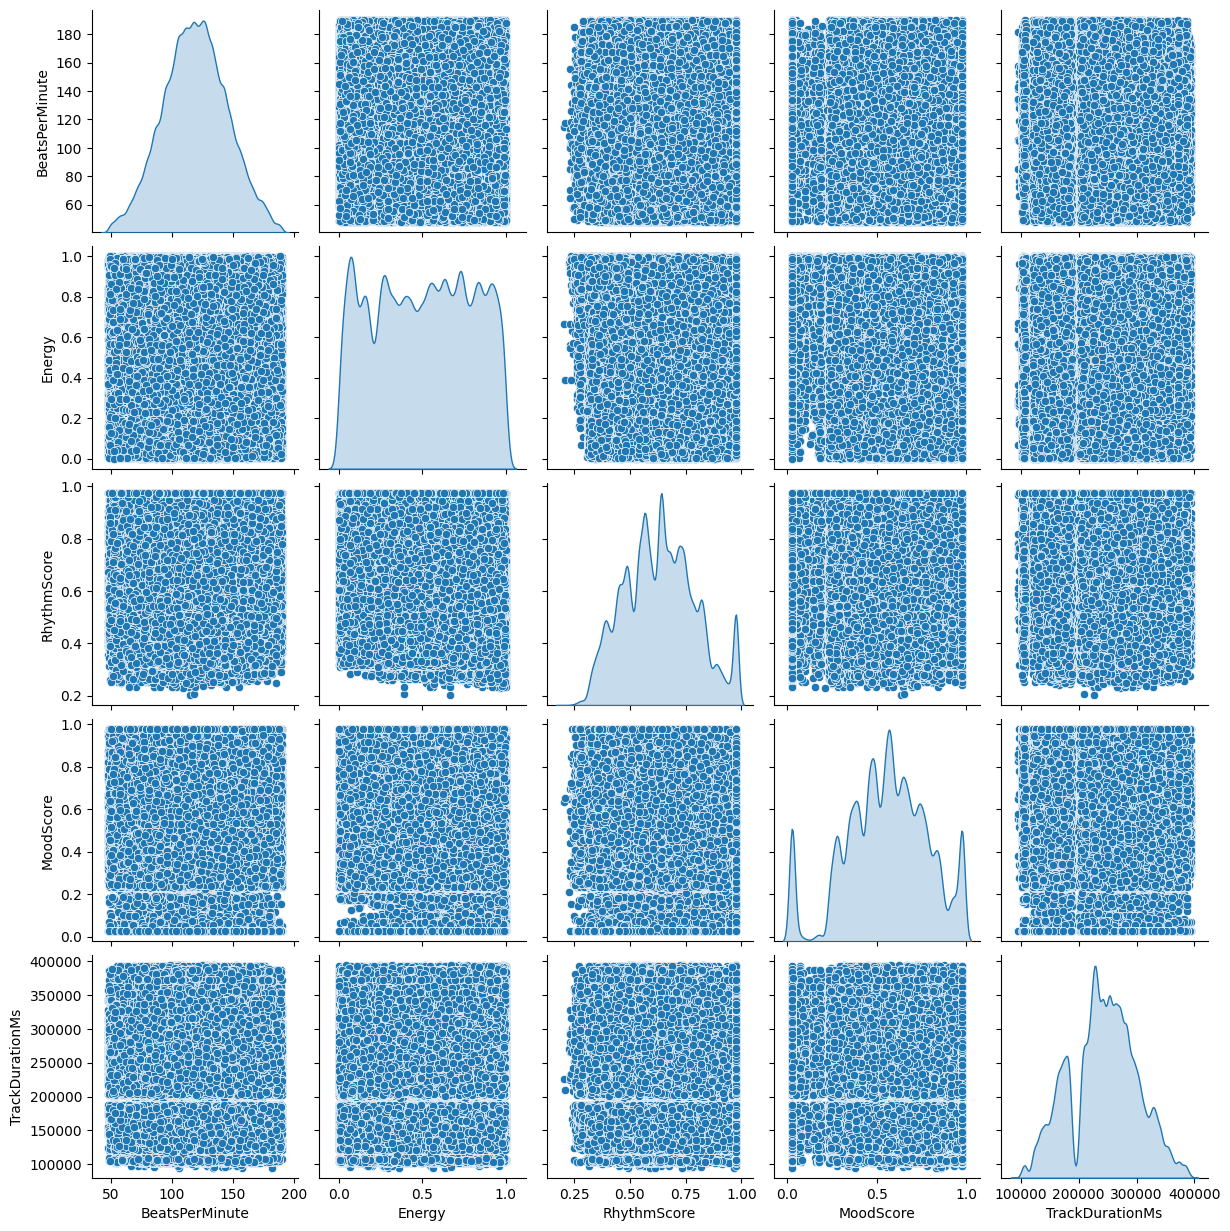

In [25]:
sns.pairplot(df[["BeatsPerMinute","Energy","RhythmScore","MoodScore","TrackDurationMs"]], diag_kind="kde")
plt.show()

In [26]:
X = df.drop(columns=['BeatsPerMinute'])  # features only
y = df['BeatsPerMinute']                  # target

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [27]:
test_df = pd.read_csv("/kaggle/input/playground-series-s5e9/test.csv")
test_df

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067
...,...,...,...,...,...,...,...,...,...,...
174717,698881,0.332976,-9.654381,0.155402,0.143983,0.351255,0.307580,0.679634,255610.4189,0.427533
174718,698882,0.828106,-11.143536,0.121822,0.451146,0.096678,0.140123,0.274977,241204.9403,0.098333
174719,698883,0.569334,-4.253765,0.137968,0.246896,0.079425,0.102919,0.569331,127422.2955,0.193200
174720,698884,0.764595,-11.088025,0.055225,0.430128,0.006836,0.105584,0.653928,171586.5838,0.067467


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled,y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# # --- 1. Train/Validation Evaluation ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred_val))
print("MSE:", mean_squared_error(y_test, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_val)))
print("MAE:", mean_absolute_error(y_test, y_pred_val))

# --- 2. Retrain on FULL data for Kaggle submission ---
model.fit(X, y)   # train on full dataset
test_pred = model.predict(test_df.drop("id", axis=1))

# --- 3. Save submission ---
submission = pd.DataFrame({
    "id": test_df["id"],
    "BeatsPerMinute": test_pred
})

submission.to_csv("Robocon4.csv", index=False)
print("✅ Submission file saved as Robocon4.csv")


R2: 0.00013672792072028095
MSE: 679.9606735083769
RMSE: 26.07605555885278
MAE: 21.019659102026562
✅ Submission file saved as Robocon4.csv


In [31]:
# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor(random_state=42)
# dt.fit(X_train, y_train)

# #Predictions
# y_pred_dt = dt.predict(X_test)

# print("R2:", r2_score(y_test, y_pred_dt))
# print("MSE:", mean_squared_error(y_test, y_pred_dt))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
# print("MAE:", mean_absolute_error(y_test, y_pred_dt))

In [32]:
# X_test_final = test_df.drop(columns=['id'])  # Remove only ID column

#  # Apply same scaling if used during training
# X_test_final_scaled = scaler.transform(X_test_final)
# y_pred = model.predict(X_test_final_scaled)
# y_pred

In [33]:
# rf = RandomForestRegressor(
#     n_estimators=300,        # fewer trees for quick baseline (100–300 later for accuracy)
#     max_depth=15,           # limit tree depth (default = unlimited)
#     min_samples_split=5,    # stop splitting earlier
#     n_jobs=-1,              # use all CPU cores
#     random_state=42
# )
# rf.fit(X_train, y_train)

# y_pred_rf = rf.predict(X_test)


# print("MAE:", mean_absolute_error(y_test, y_pred_rf))
# print("R²:", r2_score(y_test, y_pred_rf))


In [34]:
# !pip install xgboost --quiet

In [35]:
# from xgboost import XGBRegressor

# xgb = XGBRegressor(
#     n_estimators=500,    # more trees
#     learning_rate=0.1,   # slightly higher LR
#     max_depth=5,         # shallower trees to reduce overfitting
#     subsample=0.8,       # row sampling
#     colsample_bytree=0.8,
#     random_state=42
# )
# xgb.fit(X_train, y_train)


# y_pred = xgb.predict(X_test)

# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("R²:", r2_score(y_test, y_pred))


In [36]:
# from sklearn.ensemble import AdaBoostRegressor
# # Train
# ada = AdaBoostRegressor(
#     n_estimators=300,
#     learning_rate=0.05,
#     random_state=42)
# ada.fit(X_train, y_train)

# # Predict
# y_pred = ada.predict(X_test)

# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("R²:", r2_score(y_test, y_pred))


In [37]:

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [38]:

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Train Random Forest Regressor
# rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
# rf_reg.fit(X_train, y_train)
# y_pred = rf_reg.predict(X_test)

# # Evaluation
# rf_reg_rmse = mean_squared_error(y_test, y_pred)
# rf_reg_r2 = r2_score(y_test, y_pred)

# print("Random Forest Regression RMSE:", rf_reg_rmse)
# print("Random Forest Regression R²:", rf_reg_r2)

In [39]:
# from sklearn.ensemble import AdaBoostRegressor

# # Train AdaBoost Regressor
# ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
# ada_reg.fit(X_train, y_train)
# y_pred_val = ada_reg.predict(X_test)

# print("AdaBoost Validation R²:", r2_score(y_test, y_pred_val))
# print("AdaBoost Validation RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_val)))
# print("AdaBoost Validation MAE:", mean_absolute_error(y_test, y_pred_val))

# # --- 2. Retrain on FULL data for Kaggle submission ---
# ada_reg.fit(X_scaled, y)   # use full dataset now
# test_pred = ada_reg.predict(test_df.drop("id", axis=1))

# # --- 3. Save submission ---
# submission = pd.DataFrame({
#     "id": test_df["id"],
#     "BeatsPerMinute": test_pred
# })

# submission.to_csv("Robocon2.csv", index=False)
# print("✅ Submission file saved as Robocon2.csv")

In [40]:
# from sklearn.ensemble import GradientBoostingRegressor
# # Train on full training data

# gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
# gb_reg.fit(X_train, y_train)
# y_pred = gb_reg.predict(X_test)

# gb_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# gb_reg_r2 = r2_score(y_test, y_pred)

# print("Gradient Boosting Regression RMSE:", gb_reg_rmse)
# print("Gradient Boosting Regression R²:", gb_reg_r2)

In [41]:
# gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
# gb_reg.fit(X_scaled, y)   # now trained with feature names

# # Predict on test set
# test_pred = gb_reg.predict(test_df.drop("id", axis=1))

# submission = pd.DataFrame({
#     "id": test_df["id"],
#     "BeatsPerMinute": test_pred
# })

# submission.to_csv("Robocon.csv", index=False)
# print("✅ Submission file saved as Robocon.csv")
